# Exploratory Data Analysis of Marketing DataSet

This code file contains the exploratory data analysis (EDA) that I conducted as part of my job application process. The dataset used in this analysis is based on the "Bank Marketing" UCI dataset and contains information about clients who were contacted during a marketing campaign.

The goal of this EDA is to gain a better understanding of the characteristics of the target audience and the effectiveness of the marketing campaign. Specifically, we aim to answer questions such as:

* Which clients were attracted and not attracted during the campaign?
* Are there any patterns or differences between them?
* What are the key drivers and factors that influence the success of the campaign?
* What are some recommendations for improving the campaign's effectiveness?

To answer these questions, we will use various exploratory data analysis techniques and tools, such as pivot tables, scatter plots, histograms, and box plots. 

## IMPORTS

In this section, the dataset and libraries are imported.

In [ ]:
!pip install scipy

     ---------------------------------------- 42.2/42.2 MB 6.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\carna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

## Load Data Step

In this section, the Dataset is imported and a basic introductory exploration is performed.

In [ ]:
# Define the file path to the csv file
path_file = 'dataset/bank-additional-full.csv'

df = pd.read_csv(path_file,
                 sep = ';')

# Set the precision for displayed values to 2 decimal signs
pd.options.display.float_format = '{:.2f}'.format

# Check correct loading of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


The README file provides some information about the dataset size. So, we can check if all rows were loaded successfully.

According to the README file, there are 41188 rows and 20 features columns + the output/target column.

In [ ]:
df.shape

(41188, 21)

That means that everything was loaded successfully.

## Exploratory data Analysis

### Basic analysis

Additionally, the README file provides the following information about the features:

* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
*  4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* 5 - default: has credit in default? (categorical: "no","yes","unknown")
* 6 - housing: has housing loan? (categorical: "no","yes","unknown")
* 7 - loan: has personal loan? (categorical: "no","yes","unknown")

 Related with the last contact of the current campaign:


* 8 - contact: contact communication type (categorical: "cellular","telephone") 
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* 11 - duration: last contact duration, in seconds (numeric). 

   <br>Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


Other attributes:

*  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  14 - previous: number of contacts performed before this campaign and for this client (numeric)
*  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


Social and economic context attributes

*  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
*  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
*  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
*  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
*  20 - nr.employed: number of employees - quarterly indicator (numeric)


NOTE THAT Duration (i.e 11th column) should not be used in a predictive model, as it refers to an attribute that it's only known once the call finishs

Now, let's look for gaps

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Apparently, there is not NULL values is the dataset. However, note that the README file indicates that  there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.
That should be bear in mind when preparing the dataset for model training.

The method describe can be used to get some basic statistical characteristics of the dataset.

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


This shows that the average client refers to a:
* administrative
* married
* with university degree

Let's take a look at those features

In [ ]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
df["marital"].value_counts(normalize = True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

In [ ]:
df["job"].value_counts(normalize = True)

admin.          0.25
blue-collar     0.22
technician      0.16
services        0.10
management      0.07
retired         0.04
entrepreneur    0.04
self-employed   0.03
housemaid       0.03
unemployed      0.02
student         0.02
unknown         0.01
Name: job, dtype: float64

In [ ]:
df["education"].value_counts(normalize = True)

university.degree     0.30
high.school           0.23
basic.9y              0.15
professional.course   0.13
basic.4y              0.10
basic.6y              0.06
unknown               0.04
illiterate            0.00
Name: education, dtype: float64

These distribution shows that marketing campaings may focus on:
* Married clients (61%)
* Administrative, blue-collars, technicians, services and management (80% of total)
* Univeristy degree, High school, Basic 9y, Professional course (81% of total)

### Basic Insights 

Extracting data from the DataFrame, it is possible to evaluate how well our marketing campaign is doing and obtain patterns in successful cases.

In [ ]:
#First map the target column
target_coding = {"no": 0, "yes": 1}
df["y"] = df["y"].map(target_coding)
df.head()

print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


This is clearly a bad value, indicating that we have a serious problem in our clients conversion rate.

Let's analyze some patterns in the attracted clients

In [ ]:
df[df["y"] == 1].mean() 

C:\Users\carna\AppData\Local\Temp\ipykernel_10164\3967644781.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df["y"] == 1].mean()


age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

Those statistics are showing that the average age of the attracted clients is about 40, and 2 calls were required to attract them.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#print("The average age for attracted clients is", '{:.1f}'.format(df[df["y"] == 1].mean()['age']))

print("The percentage of Married attracted clients is", '{:.1%}'.format(df[(df["y"] == 1) & (df['marital']=='married')]['y'].count() / df[(df['marital']=='married')]['y'].count() 
))

most_common_jobs = ['admin.', 'blue-collar', 'technician', 'services', 'management']
print("The percentage of attracted clients with one of the top 5 most common jobs is", '{:.1%}'.format(df[(df["y"] == 1) & (df['job'].isin(most_common_jobs))]['y'].count() / df[(df['job'].isin(most_common_jobs))]['y'].count() ))

most_common_educations = ['university.degree', 'high.school','basic.9y','professional.course']
print("The percentage of attracted clients with one of the top 4 most common education levels is", '{:.1%}'.format(df[(df["y"] == 1) & (df['education'].isin(most_common_educations))]['y'].count() / df[(df['education'].isin(most_common_educations))]['y'].count() ))




The percentage of Married attracted clients is 10.2%
The percentage of attracted clients with one of the top 5 most common jobs is 10.1%
The percentage of attracted clients with one of the top 4 most common education levels is 11.4%


This indicates that the conversion rate in the main groups have a tendency as low as the global one. 
It could be advantageous to improve this statistic in these mejority groups to improve the performance of the marketing campaign. 

In [ ]:
avg_c_dur = round(df[df["y"] == 1]["duration"].mean(), 2)
print("The average call duration for attracted clients is", '{:.0f}'.format(avg_c_dur // 60 ), "min", int(avg_c_dur) % 60, "sec")

avg_c_dur = round(df[(df["y"] == 1) & (df['marital']=='married')]["duration"].mean(), 2)
print("The average call duration for merried attracted clients is", '{:.0f}'.format(avg_c_dur // 60 ), "min", int(avg_c_dur) % 60, "sec")

avg_c_dur = round(df[(df["y"] == 1) & (df['job'].isin(most_common_jobs))]["duration"].mean(), 2)
print("The average call duration for attracted clients with one of the top 5 most common jobs is", '{:.0f}'.format(avg_c_dur // 60 ), "min", int(avg_c_dur) % 60, "sec")

avg_c_dur = round(df[(df["y"] == 1) & (df['education'].isin(most_common_educations))]["duration"].mean(), 2)
print("The average call duration for attracted clients with one of the top 4 most common education levels is", '{:.0f}'.format(avg_c_dur // 60 ), "min", int(avg_c_dur) % 60, "sec")


The average call duration for attracted clients is 9 min 13 sec
The average call duration for merried attracted clients is 9 min 37 sec
The average call duration for attracted clients with one of the top 5 most common jobs is 9 min 39 sec
The average call duration for attracted clients with one of the top 4 most common education levels is 9 min 9 sec


Clearly there is a correlation between the average time we retain the customer on the call and their conversion.

### Pivot Tables

In this section, we are going to obtain distributions relating two features.

We can emphasize in:
* Target column
* Marital column
* Education column
* Job column

which are the columns we have been focusing in the previous analysis

In [ ]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'all')



marital,divorced,married,single,unknown
y,,,,
0,0.10,0.54,0.24,0.00
1,0.01,0.06,0.04,0.00


In [ ]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'columns')

marital,divorced,married,single,unknown
y,,,,
0,0.90,0.90,0.86,0.85
1,0.10,0.10,0.14,0.15


In [ ]:
pd.crosstab(df["y"],
            df["education"],
            normalize = 'columns')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
0,0.90,0.92,0.92,0.89,0.78,0.89,0.86,0.85
1,0.10,0.08,0.08,0.11,0.22,0.11,0.14,0.15


In [ ]:
pd.crosstab(df["y"],
            df["job"],
            normalize = 'columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,0.87,0.93,0.91,0.90,0.89,0.75,0.90,0.92,0.69,0.89,0.86,0.89
1,0.13,0.07,0.09,0.10,0.11,0.25,0.10,0.08,0.31,0.11,0.14,0.11


From the above analysis, it can be seen that irrespective of the subgroup to which the client belongs, there are no significant deviations with respect to the global conversion rate of 11.3%.

Except for an increase in the conversion rate for those clients who are retired or are students. 

#### Visualization

In this section, we seek to facilitate the interpretation of the relationship between attributes by means of data visualisation instead of their materialisation in raw tables.

##### Scatter Matrix
First, let's use the Scatter matrix to visualize the pairwise dependencies between the features of Age, Duration and Campaing

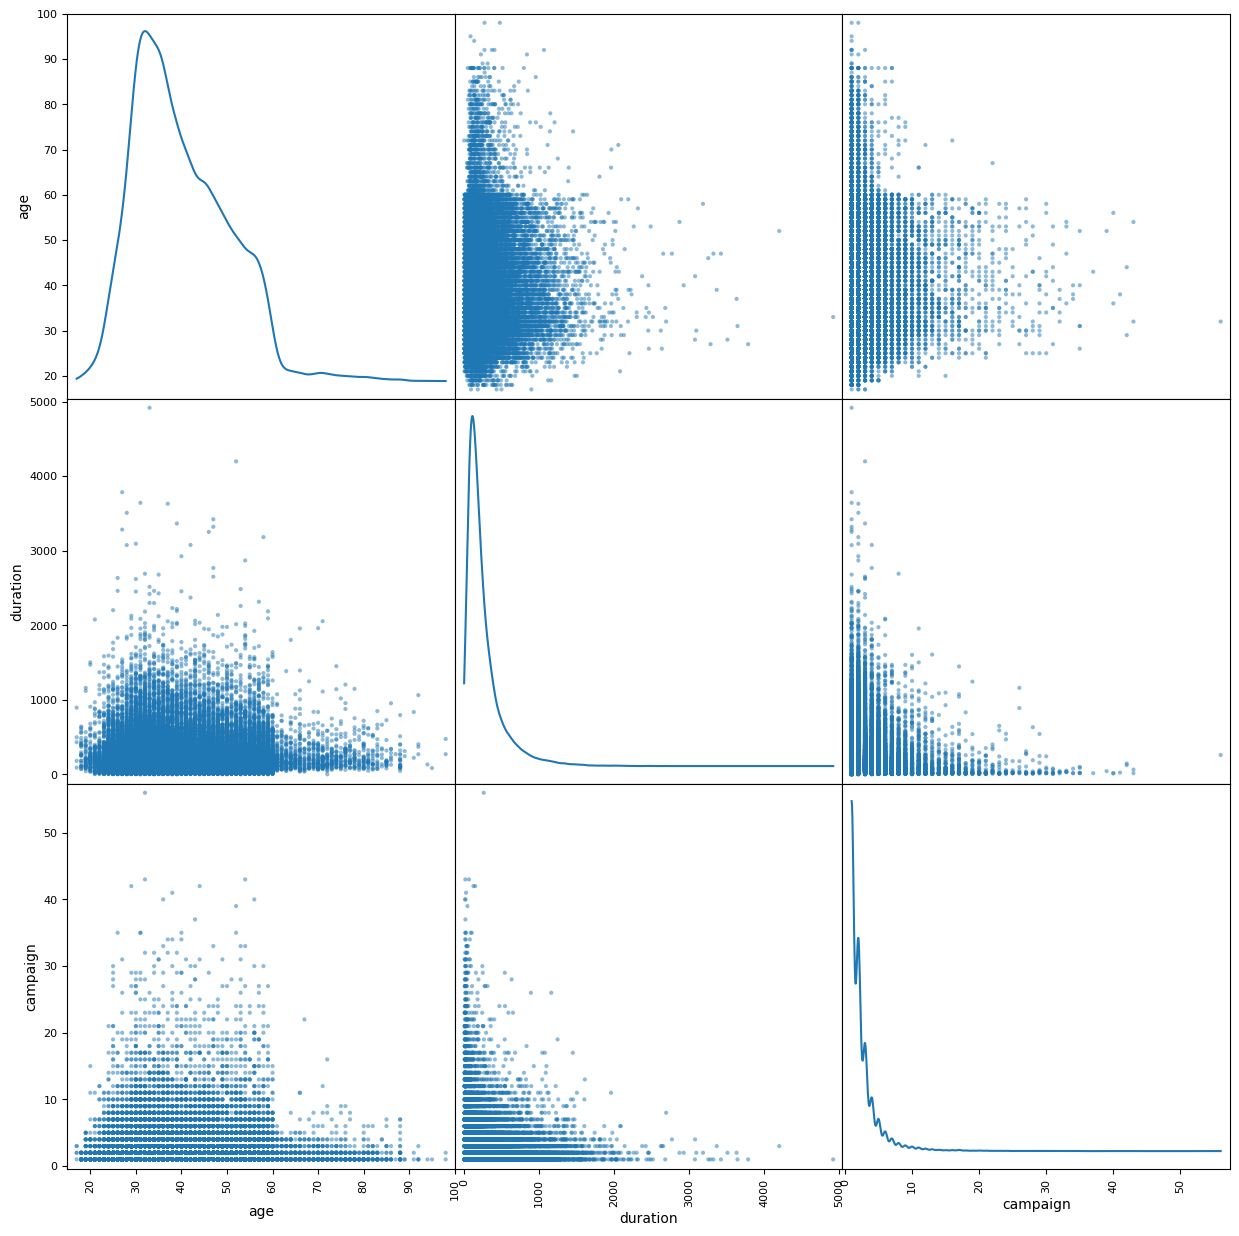

In [ ]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

We can also analyze whether this dependencies are the same for attracted and not attracted clients.

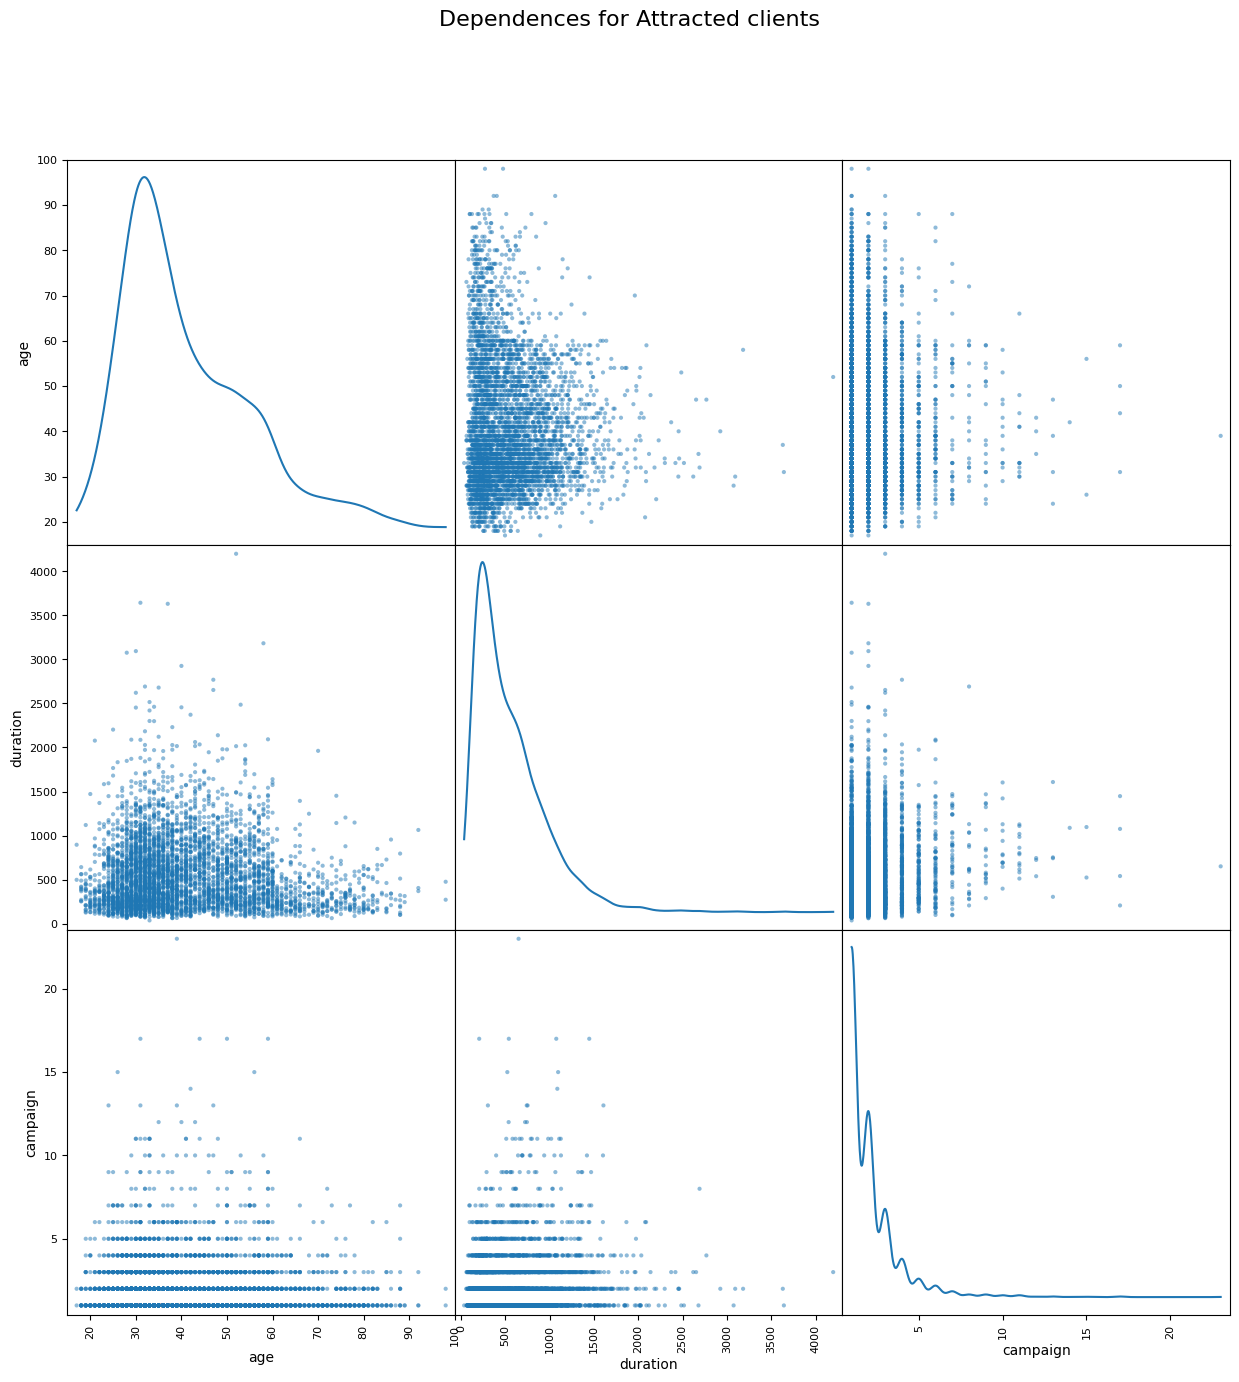

In [ ]:

pd.plotting.scatter_matrix(
    df[df['y']==1][["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.suptitle('Dependences for Attracted clients', fontsize = 16)
plt.show()


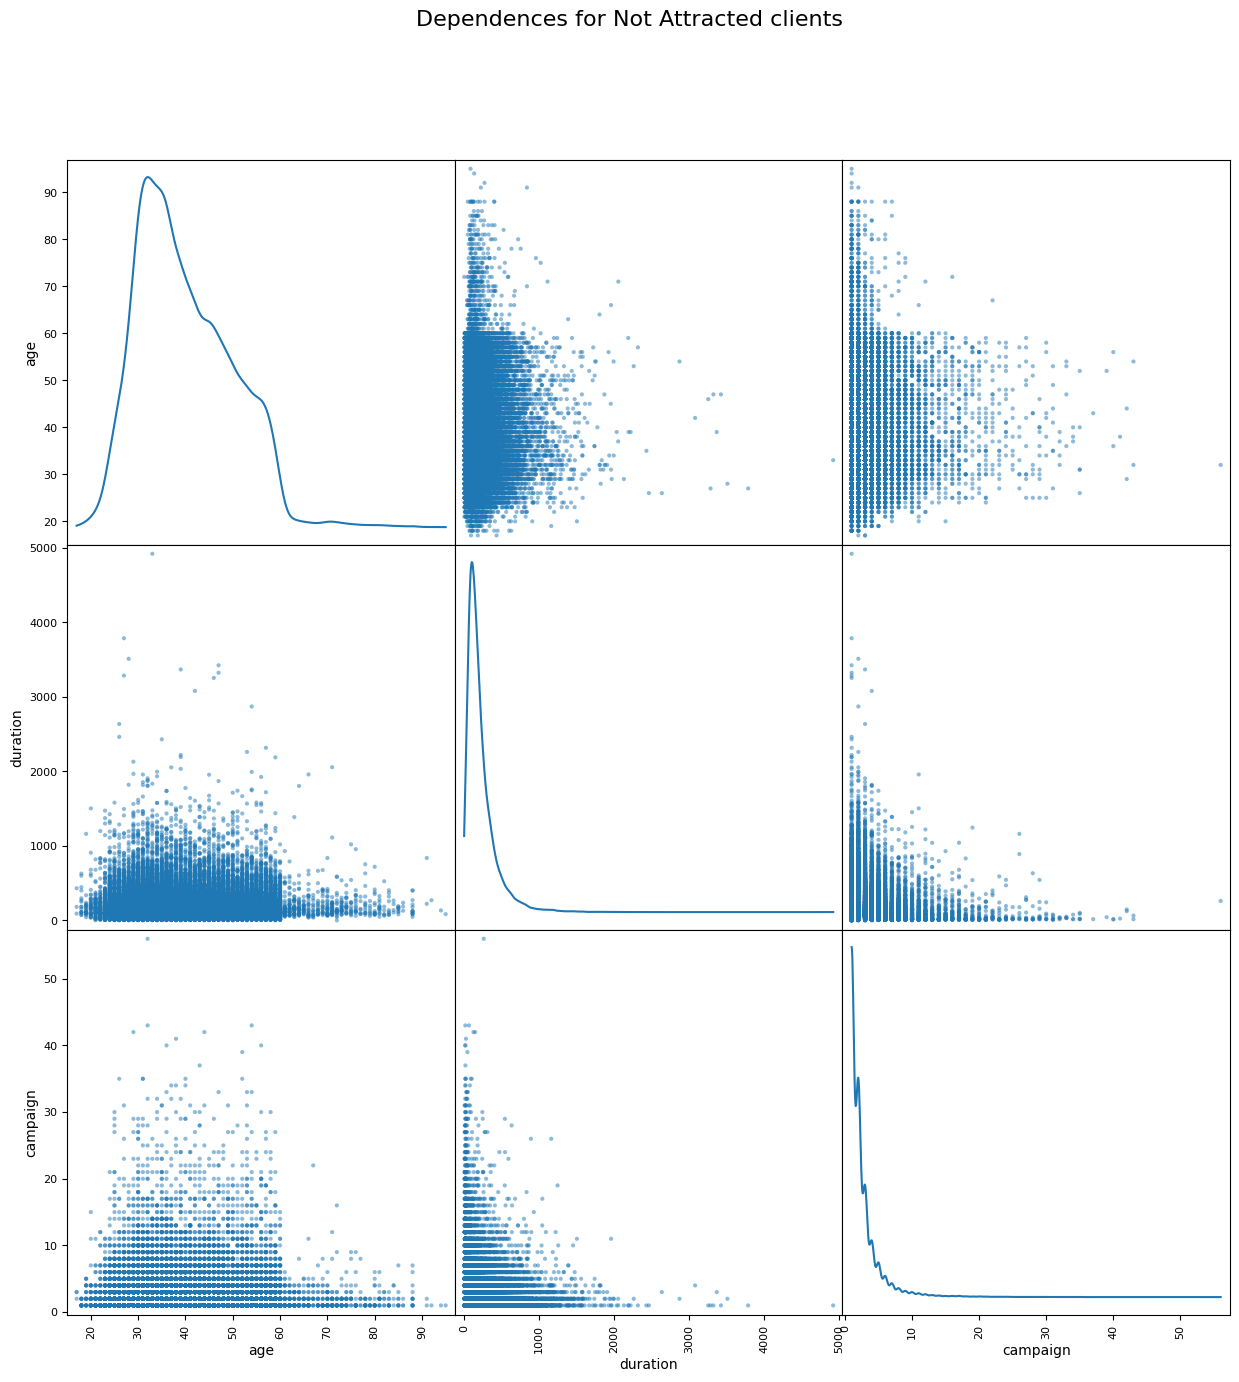

In [ ]:
pd.plotting.scatter_matrix(
    df[df['y']==0][["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.suptitle('Dependences for Not Attracted clients', fontsize = 16)
plt.show()

As we can see, the distributions are similar. However, it can be seen that the distribution of the duration field is shifted to the right for the attracted clients. This is consistent but not novel.

##### Histogram
Similarly, the histogram of the features can be analyzed all together

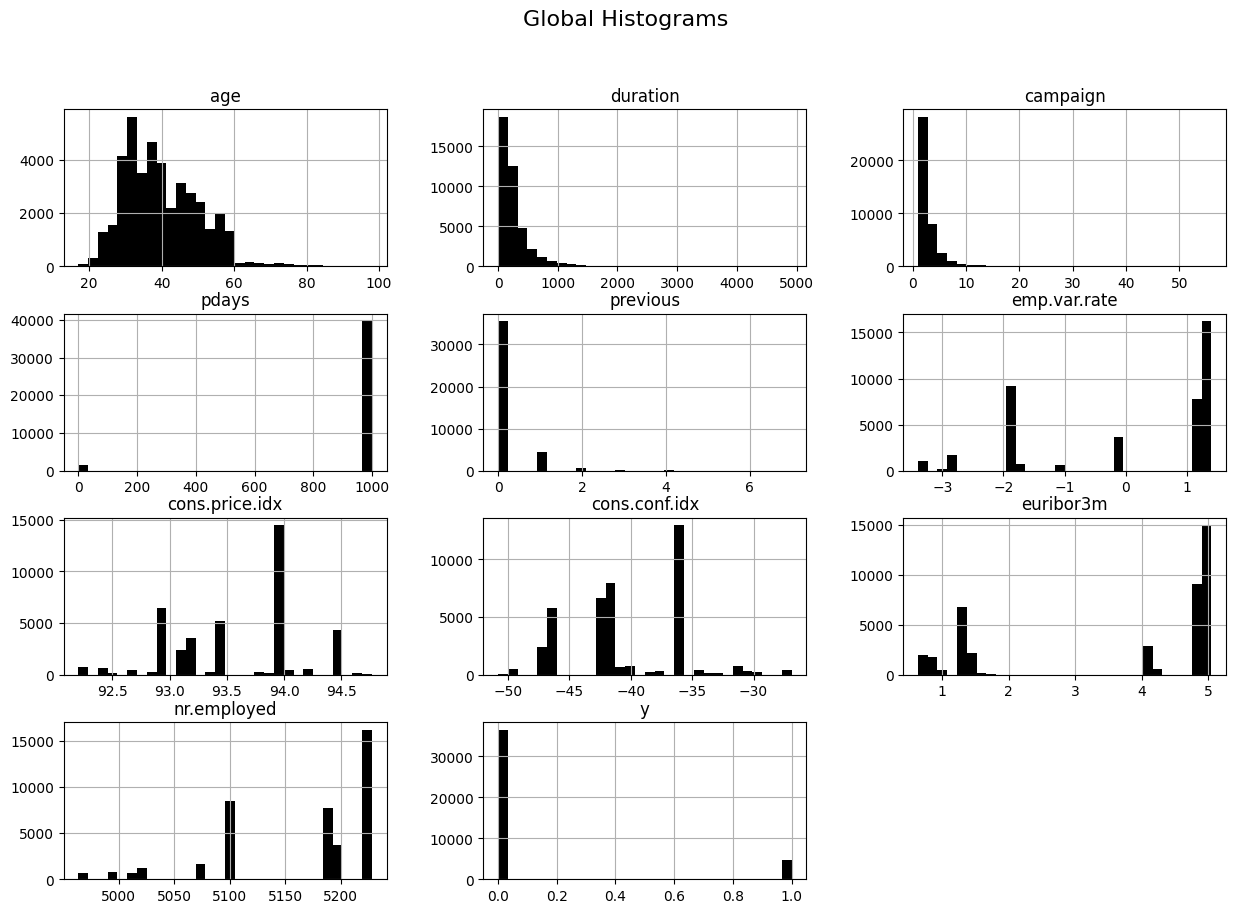

In [ ]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.suptitle('Global Histograms', fontsize=16)
plt.show()

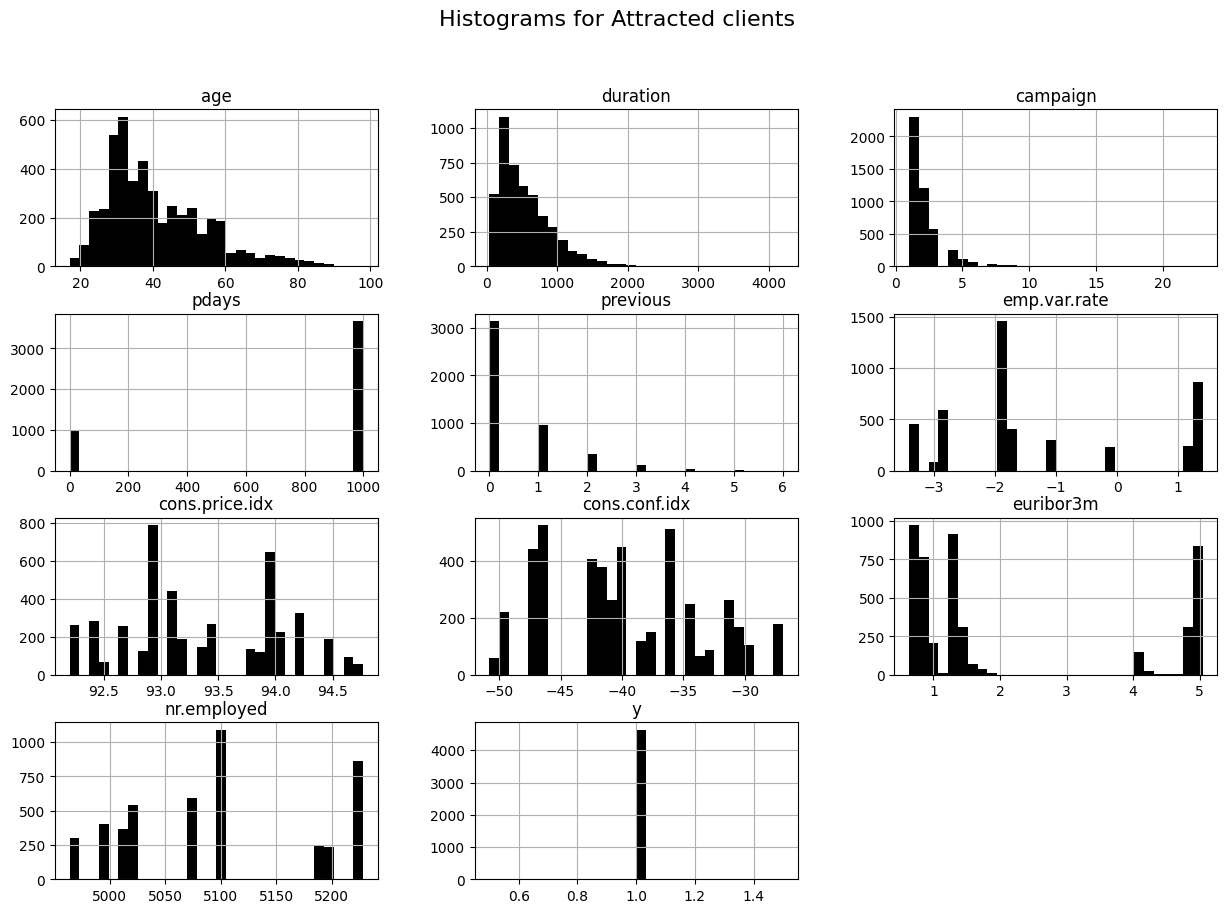

In [ ]:
df[(df['y']==1)].hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.suptitle('Histograms for Attracted clients', fontsize=16)
plt.show()

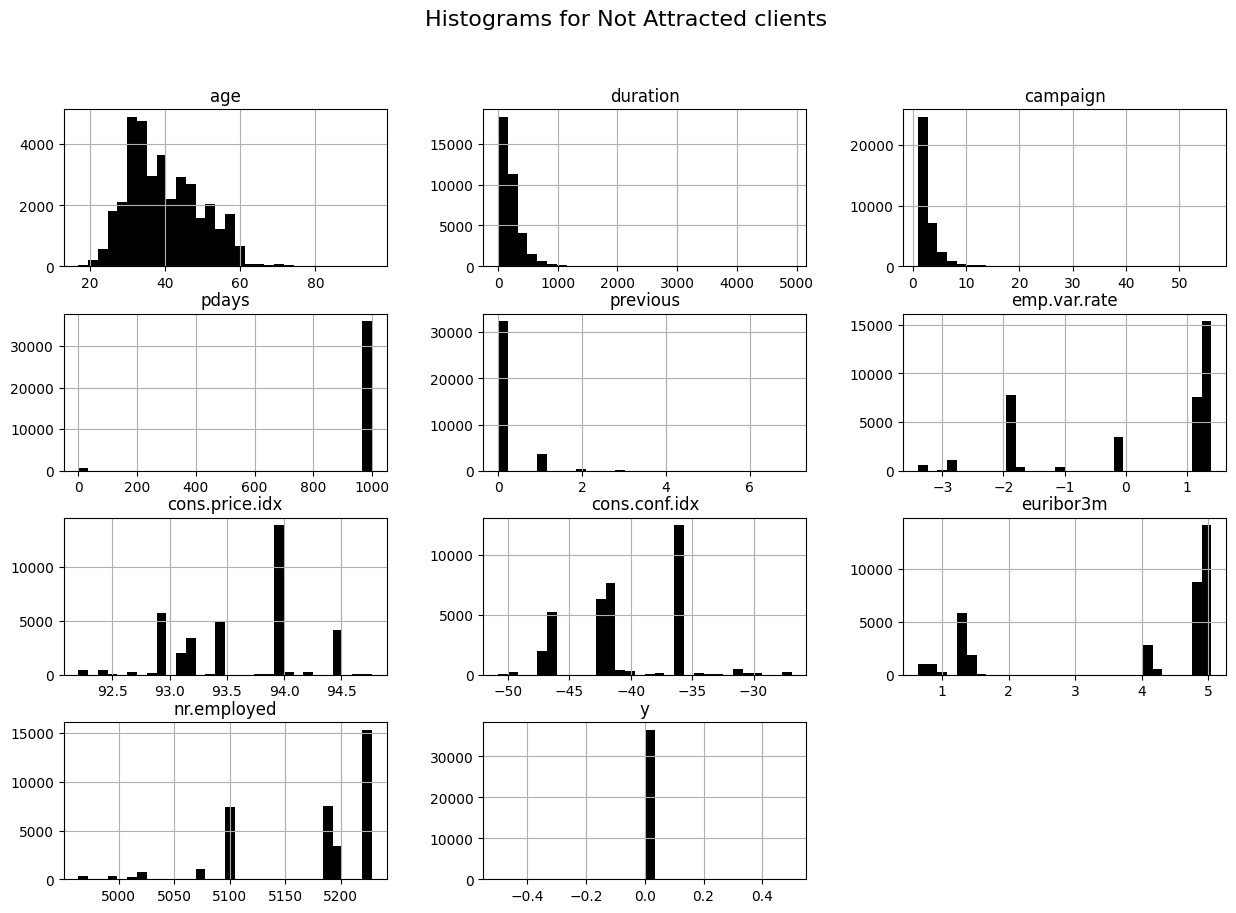

In [ ]:
df[(df['y']==0)].hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.suptitle('Histograms for Not Attracted clients', fontsize=16)
plt.show()

Most notably, the attracted clients were contacted proportionally more times previously to the campaign analysed.

##### Boxplot

Since the probability distributions above plotted didn't give us remarkable correlations, we can seek to focus marketing efforts on small groups.

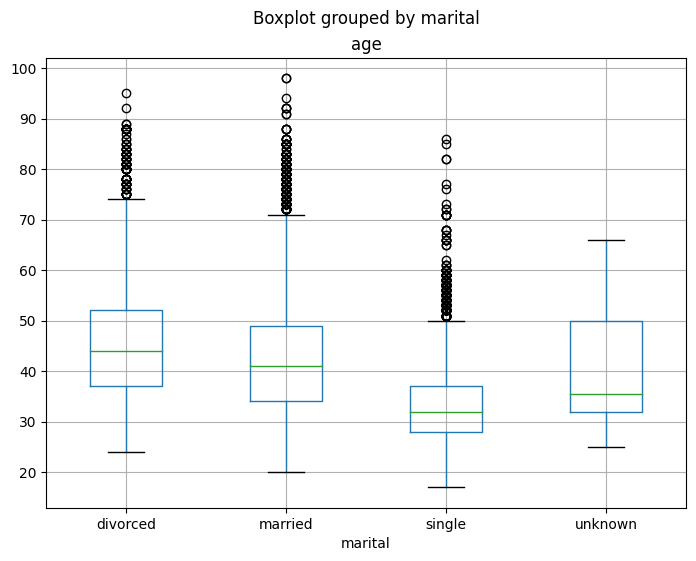

In [ ]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

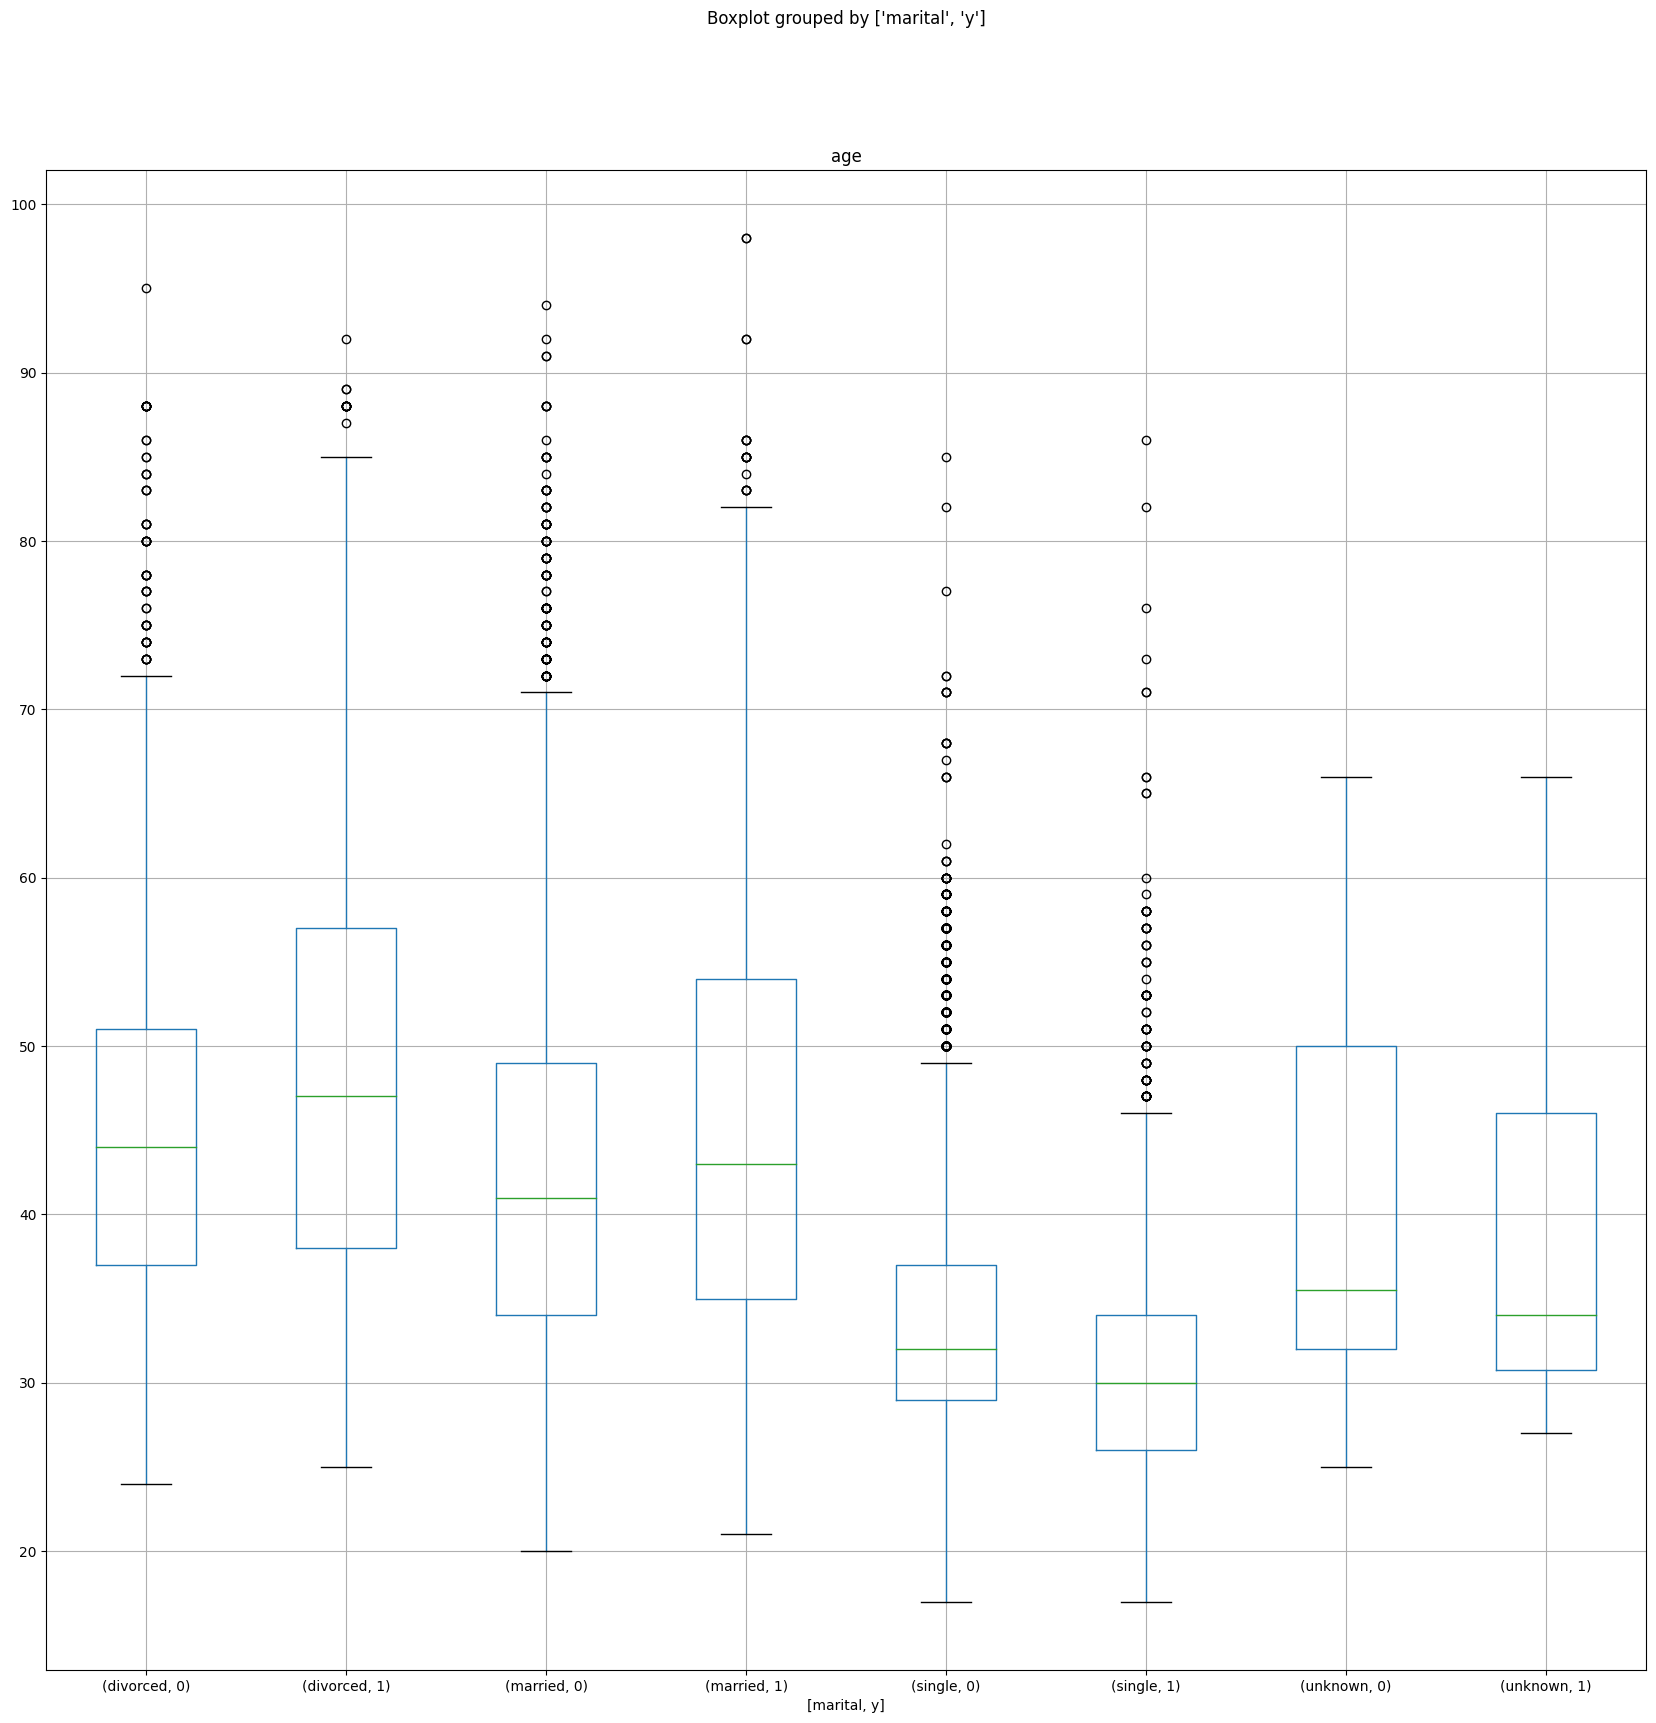

In [ ]:
df.boxplot(column = "age",
           by = ["marital", "y"],
           figsize = (20, 20))
plt.show()

From the above, we should focus on potential clients between 30 and 50 years old,  regardless of marital status.

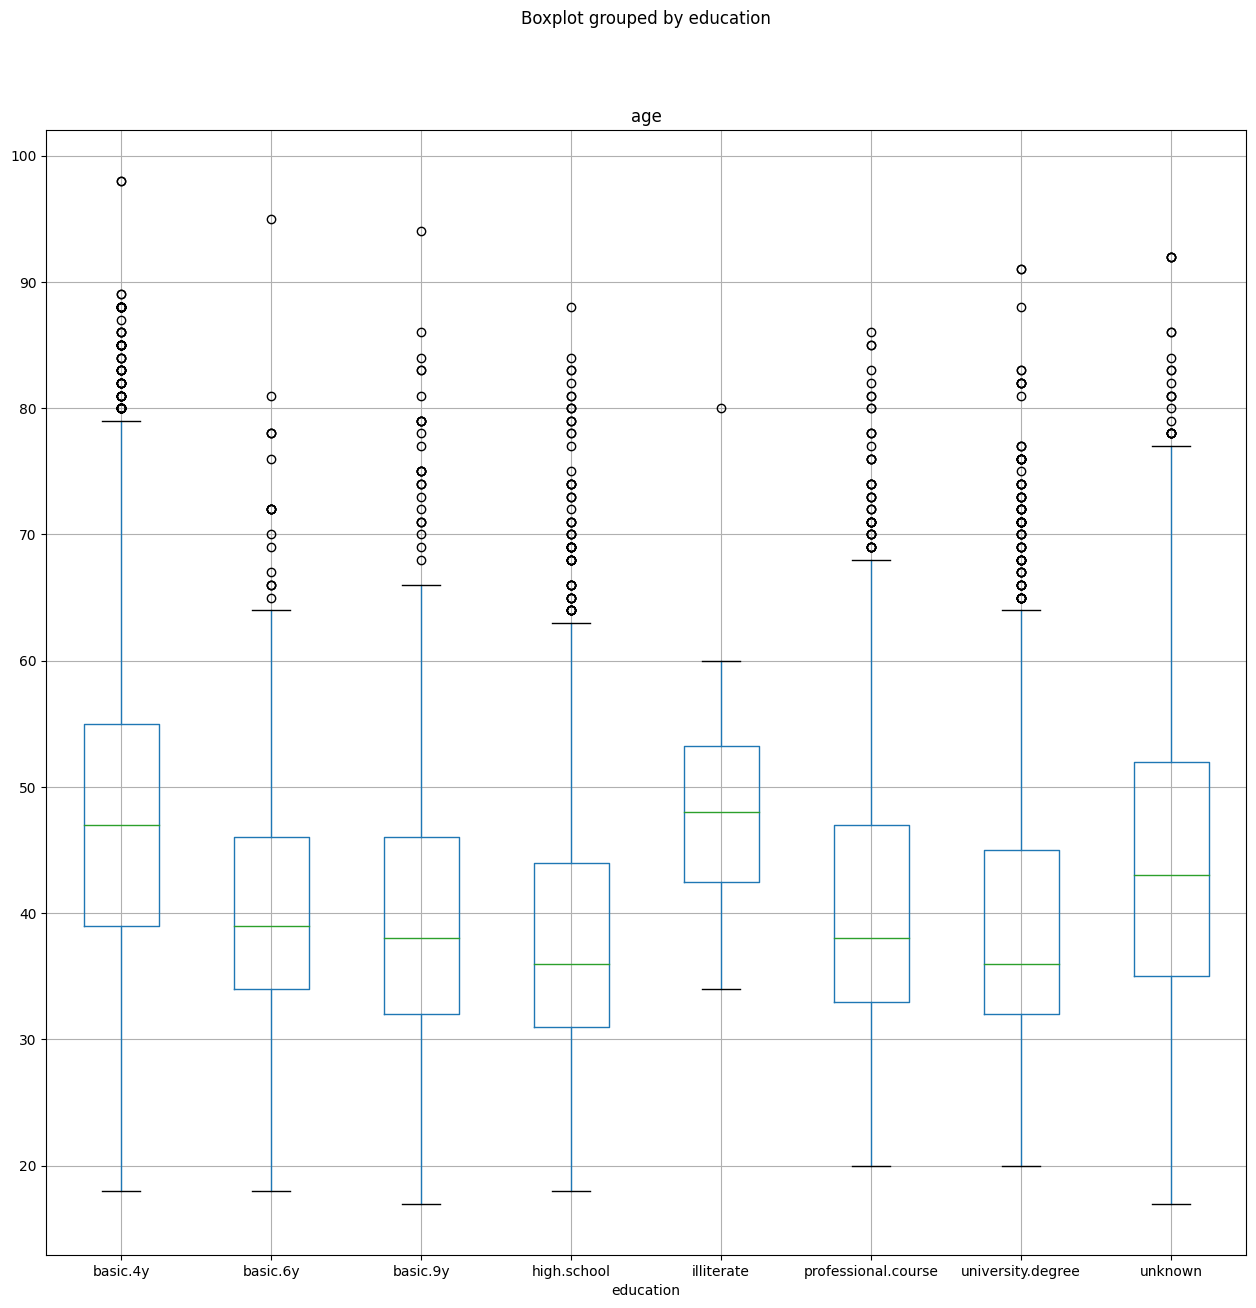

In [ ]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

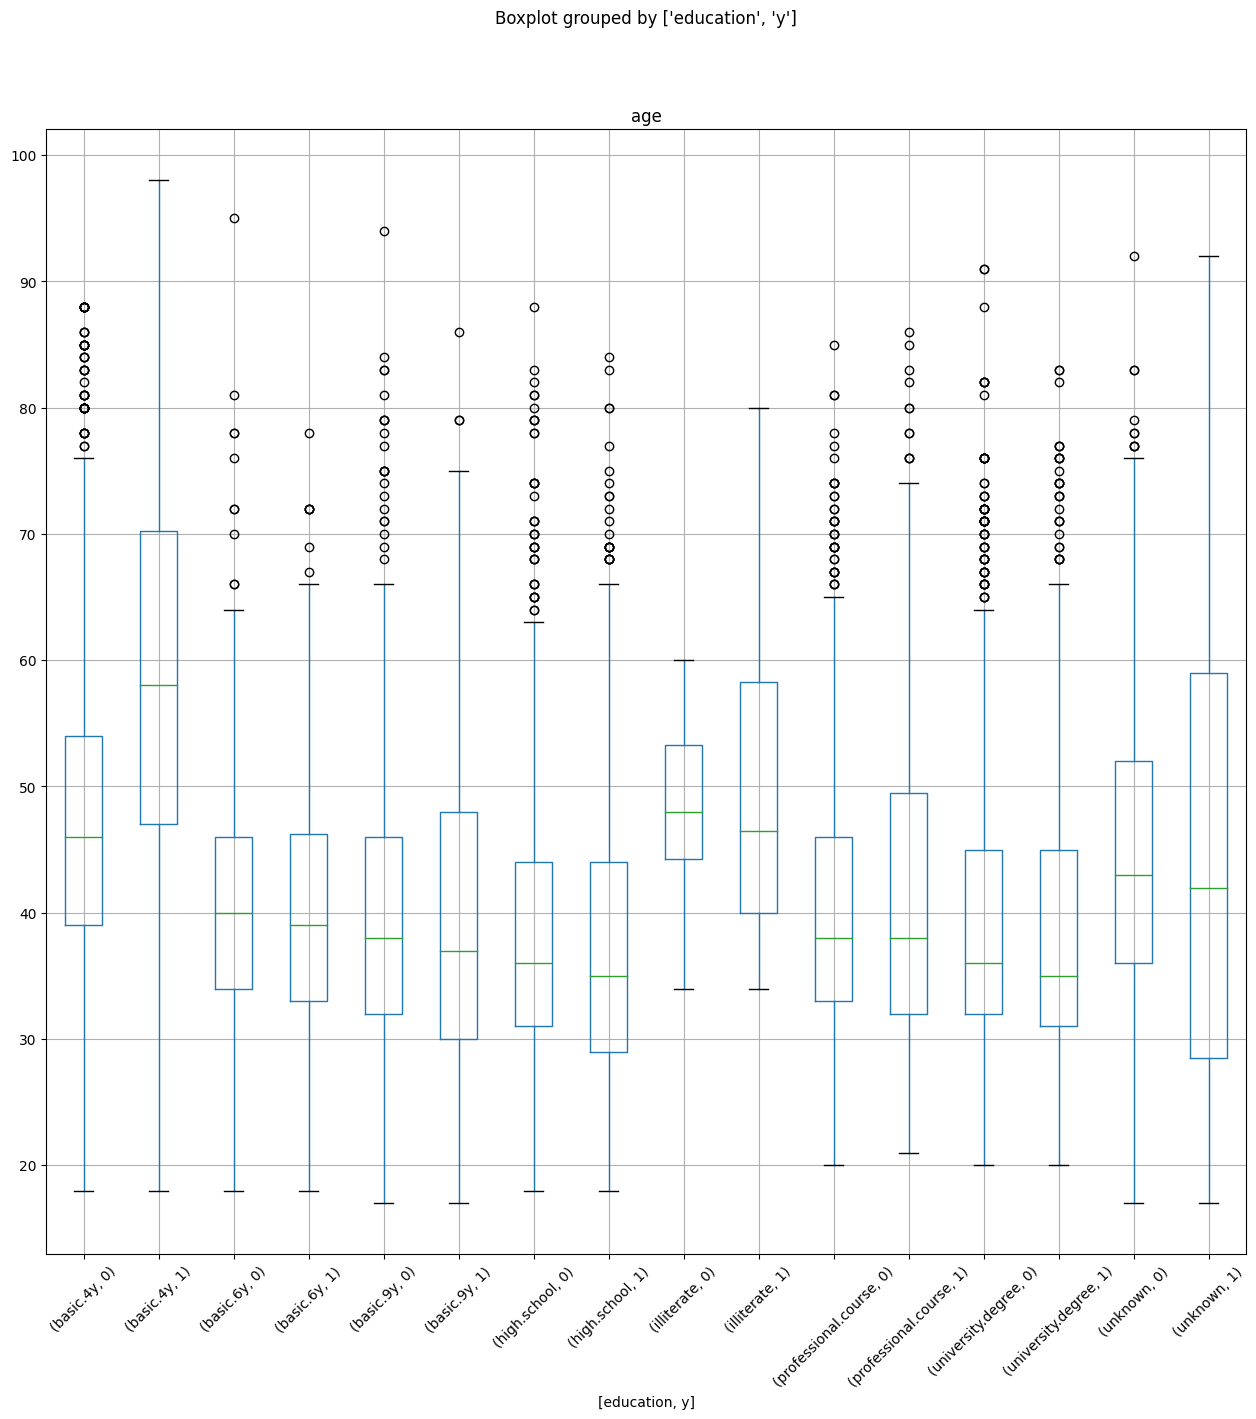

In [ ]:
df.boxplot(column = "age",
  by = ["education",'y'],
  figsize = (15, 15))
plt.xticks(rotation=45)
plt.show()

Similarly, we should focus on potential clients between 30 and 50 years old,  regardless of their education level.

## Conclusion:

In conclusion, this exploratory data analysis (EDA) has provided some valuable insights into the characteristics of the target audience and the effectiveness of the marketing campaign. We have used various techniques and tools to analyze the data, including pivot tables, scatter plots, histograms, and box plots. However, despite our efforts, we could not find a clear pattern to distinguish between attracted and not attracted clients.

Therefore, the next step is to use some classification models to predict the success of the marketing campaign based on the available features. We will use techniques such as logistic regression, decision trees, Support vector machine and Neural Networks to build and evaluate our models. We will also perform some feature hyperparameter explotarion to improve the accuracy and Data sensitivity analysis to  improve the interpretability of our models.